# <font color='black'>Projeto 1 - Segmentação de Clientes de Food Delivery</font>


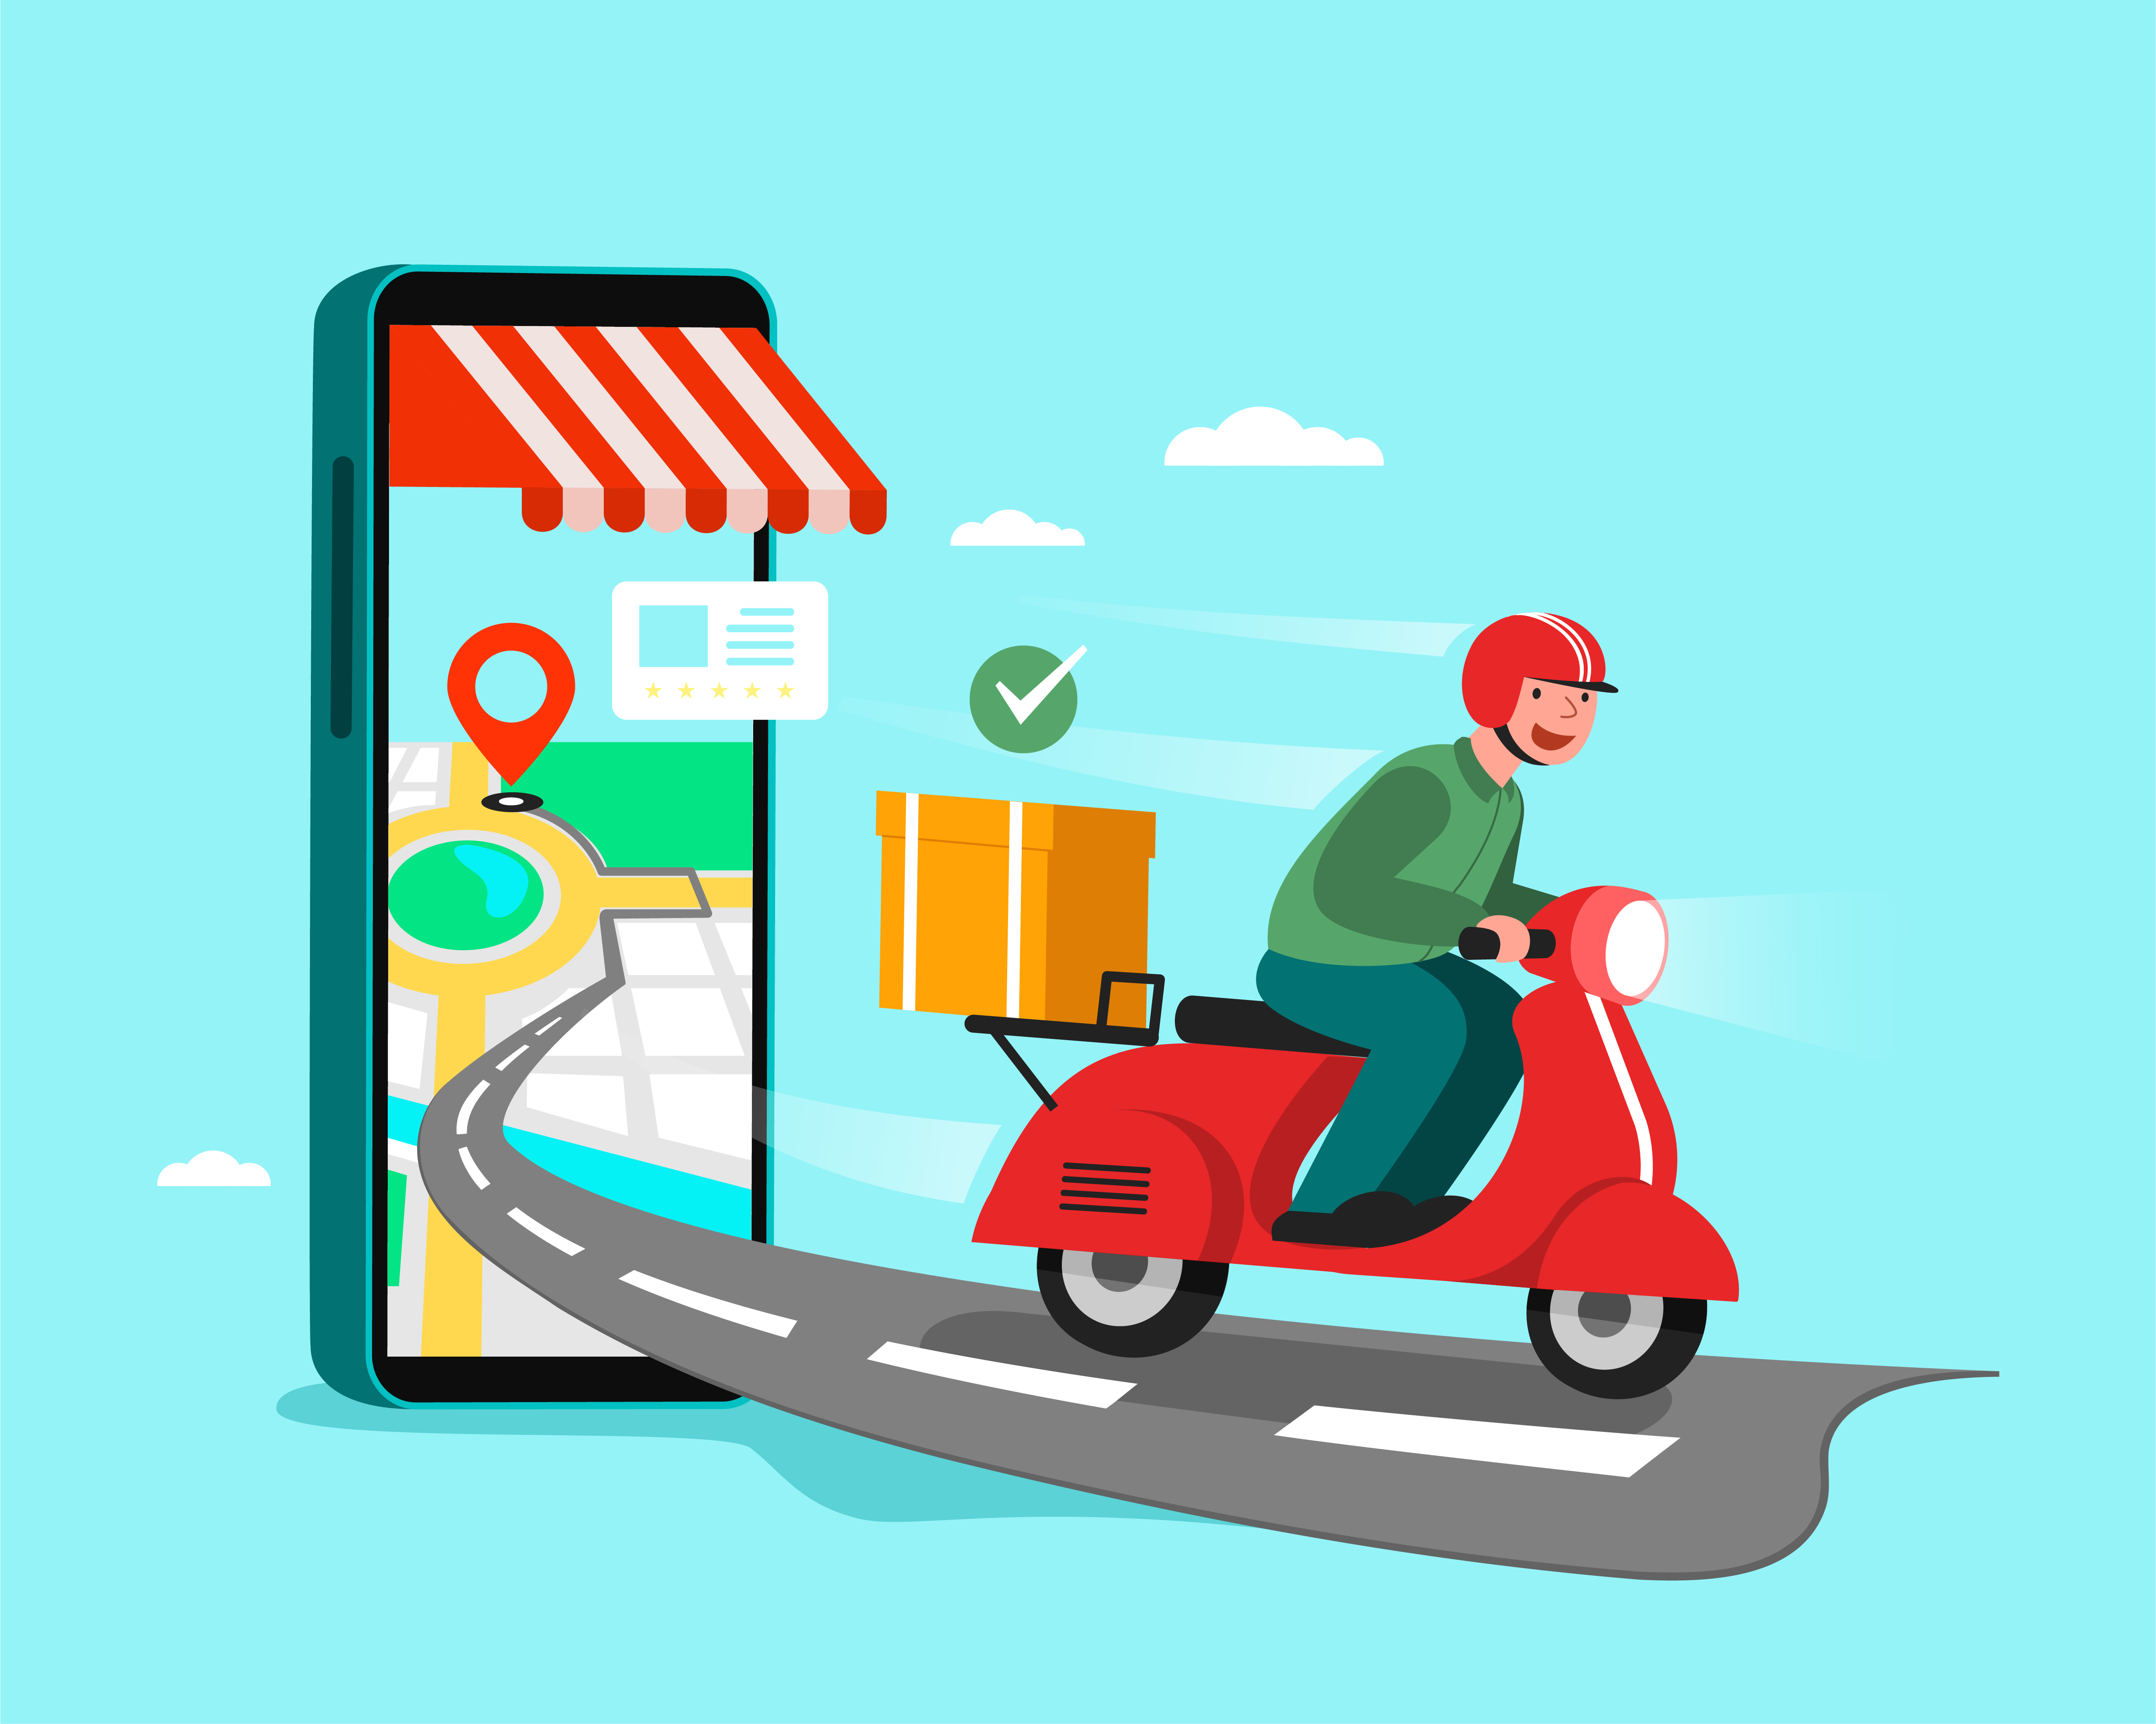



# <font color='black'>1. Descrição do Projeto:</font>


# <font color='black'>2. Iniciando o Projeto:</font>
### <font color='black'>2.1 Carregando os Pacotes:</font>

In [1]:
import time
import sklearn
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

#Formatação dos Gráficos:
plt.style.use('fivethirtyeight')
plt.figure(1, figsize = (15, 6))
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

### <font color='black'>2.2 Carregando os Dados:</font>

In [2]:
#Carregando dataset

dados_food_delivery = pd.read_csv("dados/dataset.csv", encoding = 'utf-8')

In [3]:
#Visualizar os dados
dados_food_delivery.head()

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item,latitude,longitude
0,0x7901ee,2019-01-16 18:33:00,7,bebida,2,41.794132,-88.010140
1,0x7901ee,2019-01-16 18:33:00,7,pizza,2,41.794132,-88.010140
2,0x7901ee,2019-01-16 18:33:00,7,sobremesa,2,41.794132,-88.010140
3,0x12b47f,2019-09-04 12:36:00,3,salada,1,41.884490,-87.627059
4,0x12b47f,2019-09-04 12:36:00,3,sobremesa,1,41.884490,-87.627059


### <font color='black'>2.3 Dicionário de Dados:</font>

Variável           |Descrição                    
-------------------|--------------------------------------------------------
**id_transacao**   |ID da transação, pode ter vários itens de um pedido.
**horario_pedido** | Horário exato do pedido.
**localidade**     | Unidade do restaurante que processou o pedido.
**nome_item**      | Nome do item.
**quantidade_item**| Quantidades de itens no pedido.
**latitude**       |Latitude da localidade onde o pedido foi gerado.
**longitude**      |Longitude da localidade onde o pedido foi gerado.

### <font color='black'>2.4 Análise Exploratória dos Dados:</font>

In [4]:
# Verificar tipos de dados

dados_food_delivery.dtypes

id_transacao        object
horario_pedido      object
localidade           int64
nome_item           object
quantidade_item      int64
latitude           float64
longitude          float64
dtype: object

In [7]:
# Número de linhas e colunas

dados_food_delivery.shape

(260645, 7)

In [5]:
# Resumo Estatístico dos Dados

dados_food_delivery.describe()

,localidade,quantidade_item,latitude,longitude
count,260645.000000,260645.000000,260645.000000,260645.000000
mean,5.134904,2.447010,41.836095,-87.733930
std,2.551846,1.330863,0.144459,0.136369
min,1.000000,1.000000,41.524598,-88.010140
25%,3.000000,1.000000,41.784576,-87.849468
50%,5.000000,2.000000,41.881818,-87.677606
75%,7.000000,4.000000,41.889047,-87.627059
max,9.000000,5.000000,42.049306,-87.607565


In [6]:
# Quantidade de Valores únicos por colunas

dados_food_delivery.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
latitude                9
longitude               9
dtype: int64

In [7]:
# Criar uma tabela pivot com id_transacao, nome_item e quantidade_item

tabela_pivot = dados_food_delivery.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')

In [8]:
tabela_pivot

nome_item,bebida,pizza,salada,sobremesa
id_transacao,,,,
0x10000a,NaN,1.0,NaN,1.0
0x100058,NaN,2.0,NaN,2.0
0x1000c8,4.0,4.0,1.0,5.0
0x10014c,NaN,1.0,NaN,1.0
0x1001d8,3.0,3.0,NaN,3.0
...,...,...,...,...
0xffe96,4.0,4.0,NaN,4.0
0xffeed,NaN,1.0,NaN,1.0
0xfff07,1.0,1.0,NaN,1.0


In [75]:
# Substituindo os valores NaN gerados por 0 e transformando o índice por coluna

item_pedidos = tabela_pivot.fillna(0).reset_index()

In [76]:
item_pedidos

nome_item,index,id_transacao,bebida,pizza,salada,sobremesa
0,0,0x10000a,0.0,1.0,0.0,1.0
1,1,0x100058,0.0,2.0,0.0,2.0
2,2,0x1000c8,4.0,4.0,1.0,5.0
3,3,0x10014c,0.0,1.0,0.0,1.0
4,4,0x1001d8,3.0,3.0,0.0,3.0
...,...,...,...,...,...,...
99995,99995,0xffe96,4.0,4.0,0.0,4.0
99996,99996,0xffeed,0.0,1.0,0.0,1.0
99997,99997,0xfff07,1.0,1.0,0.0,1.0
99998,99998,0xfff4d,0.0,2.0,0.0,2.0


In [77]:
#Tipos de dados

item_pedidos.dtypes

nome_item
index             int64
id_transacao     object
bebida          float64
pizza           float64
salada          float64
sobremesa       float64
dtype: object

### <font color='black'>2.5 Análise Descritiva dos Dados</font>

#### <font color='black'>Gráficos das Distribuições dos Dados:</font>

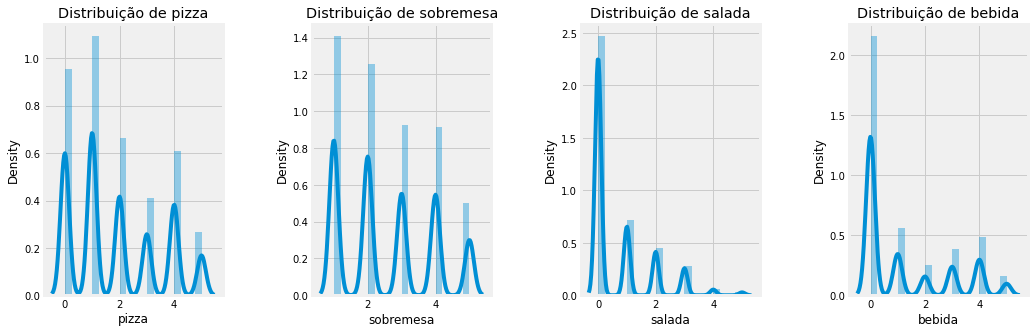

In [78]:
# Área de plotagem

plt.figure(1, figsize = (20,5))

#inicialização do contador

cont = 0

for x in ['pizza', 'sobremesa', 'salada', 'bebida']:
    cont += 1 
    plt.subplot(1 , 5 , cont)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(item_pedidos[x], bins = 20)
    plt.title('Distribuição de {}'.format(x))

plt.show()

### Gráficos com linhas de Regressão: 

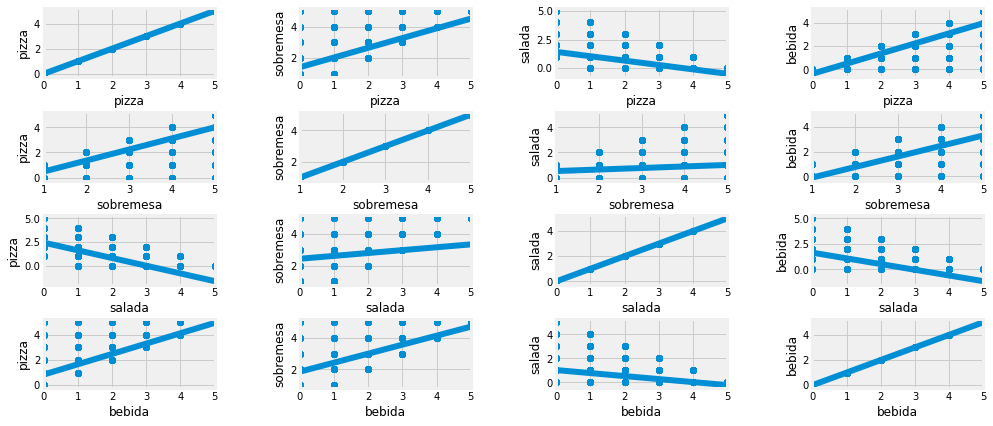

In [79]:
plt.figure(1, figsize = (15,7))

cont = 0

for x in ['pizza', 'sobremesa', 'salada', 'bebida']:
    for y in ['pizza', 'sobremesa', 'salada', 'bebida']:
        cont += 1
        plt.subplot(4,4,cont)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        sns.regplot(x = x, y = y, data = item_pedidos)
        plt.ylabel(y)
plt.show()

# <font color='black'> 3.Clusterização</font>


### 3.1 Definindo as Variáveis para Segmentação

In [80]:
df = item_pedidos[['index', 'bebida', 'pizza', 'sobremesa', 'salada']]
df.head()

nome_item,index,bebida,pizza,sobremesa,salada
0,0,0.0,1.0,1.0,0.0
1,1,0.0,2.0,2.0,0.0
2,2,4.0,4.0,5.0,1.0
3,3,0.0,1.0,1.0,0.0
4,4,3.0,3.0,3.0,0.0


### 3.2 Segmentação usando 2 Variáveis (Pizza e Sobremesa)

In [81]:
X1 = df[['pizza', 'sobremesa']].iloc[: , :].values

In [82]:
# Soma dos quadrados dentro do cluster WCSS (Within Cluster Sum of Squares)

wcss_X1 = []

In [83]:
# Encontrando o Valor Ideal de Grupos (K)

# Vamos testar valores de K entre 2 e 10

for n in range(2,11):
    modelo = (KMeans(n_clusters = n,
                     init = 'k-means++',
                     n_init = 10,
                     max_iter = 300,
                     tol = 0.0001,
                     random_state = 111,
                     algorithm = 'elkan'))
    modelo.fit(X1)
    wcss_X1.append(modelo.inertia_)


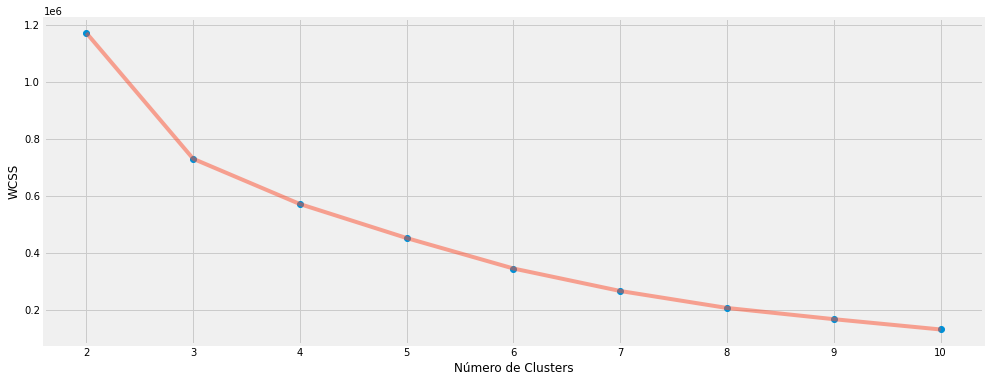

In [26]:
plt.figure(1, figsize = (15, 6))
plt.plot(np.arange(2,11), wcss_X1, 'o')
plt.plot(np.arange(2,11), wcss_X1, '-', alpha = 0.5)
plt.xlabel('Número de Clusters'), plt.ylabel('WCSS')
plt.show()

### 3.2.1 Construindo e Treinando o Modelo

In [84]:
#Criando o Modelo
modelo1 = KMeans(n_clusters = 2,
                 init = 'k-means++',
                 n_init = 10,
                 max_iter = 300,
                 tol = 0.00001,
                 algorithm = 'elkan')

In [85]:
#Treinando o Modelo
modelo1.fit(X1)

KMeans(algorithm='elkan', n_clusters=2, tol=1e-05)

In [86]:
# Extração dos Labels

labels1 = modelo1.labels_
labels1

array([0, 0, 1, ..., 0, 0, 0])

In [87]:
# Extração dos Centróides

centroids1 = modelo1.cluster_centers_
centroids1

array([[0.881644  , 1.82183485],
       [3.79958153, 4.05580631]])

### 3.2.2 Visualização e Interpretação dos Segmentos

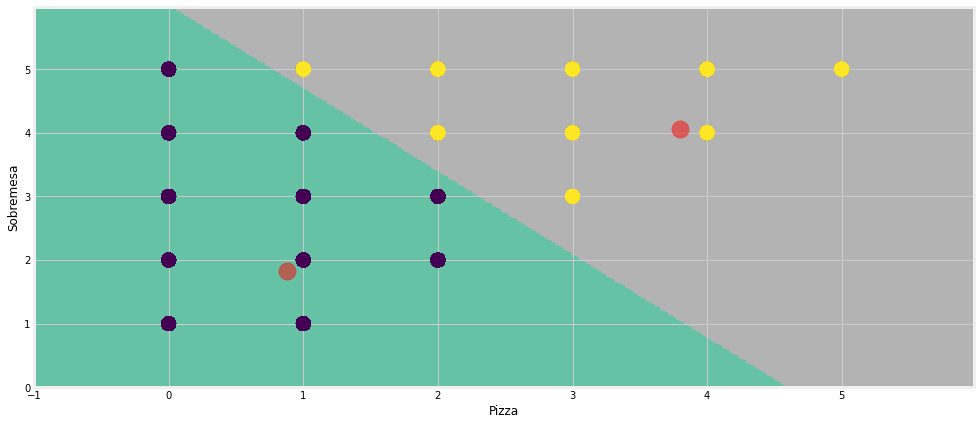

In [88]:
h = 0.02
x_min, x_max = X1[:, 0].min()-1, X1[:, 0].max() +1
y_min, y_max = X1[:, 1].min()-1, X1[:, 1].max() +1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
z = modelo1.predict(np.c_[xx.ravel(), yy.ravel()])
plt.figure(1, figsize = (15,7))
plt.clf()
z = z.reshape(xx.shape)

plt.imshow(z, interpolation = 'nearest',
           extent = (xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2,
           aspect = 'auto',
           origin = 'lower')

plt.scatter(x = 'pizza', y = 'sobremesa', data = df, c = labels1, s = 200)
plt.scatter(x = centroids1[:, 0], y = centroids1[:, 1], s = 300, c = 'red', alpha = 0.5)
plt.xlabel('Pizza')
plt.ylabel('Sobremesa')
plt.show()

## Interpretando o gráfico:

  Temos dois grupos (cinza e verde), os pontos em vermelhos são os centróides de cada cluster. No grupo verde, temos os clientes que pediram 0, 1 ou 2 Pizzas, enquanto que no grupo cinza estão os clientes que pediram 2, 3, 4 ou 5 Pizzas. Podemos observar também que conforme aumenta o número de Pizzas, o número de Sobremesas também aumenta.

### Análise:

Grupo Verde: Clientes que pedem menos pizzas. Todos pedem sobremesa.
Grupo Cinza: Clientes que pedem mais pizzas. Todos pedem sobremesa em volume maior.

Como estratégia de Marketing, poderíamos oferecer ao cliente uma sobremesa grátis no caso de comprar mais de duas pizzas.